## Data

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://covidtracking.com/api/states/daily'
request = requests.get(url)
data = request.json()
df = pd.DataFrame.from_records(data)

In [3]:
daily_cases_by_state = df.pivot(index='state', columns='date', values='positive')

## Style

In [4]:
styles = [
    {"selector": "th", "props": [("font-size", "150%"), ('background-color', 'black'), ('color', 'white')]}, 
    {"selector": "td", "props": [("font-size", "150%"), ('background-color', 'black')]}
]

def color_alert(val):
    if val > 0.5:
        color = "red"
    elif val > 0.3:
        color = "orange"
    elif val > 0.1:
        color = "yellow"
    else:
        color = "gray"
    return 'color: %s' % color

## Summary

In [5]:
def recent_growth(df):
    last_date = df.columns[-1]
    ago_1d = df.columns[-2]
    ago_3d = df.columns[-4]
    ago_7d = df.columns[-8]
    dates = [ago_7d, ago_3d, ago_1d, last_date]

    growth = df
    total_row = pd.DataFrame({date: total for date, total in zip(dates, df[dates].sum())}, index =["TOTAL"])
    growth = pd.concat([total_row, growth])
    
    growth['# Cases'] = growth[last_date]
    growth['%/day (1d)'] = growth[last_date]/growth[ago_1d] - 1
    growth['%/day (3d)'] = (growth[last_date]/growth[ago_3d]).pow(1/3) - 1
    growth['%/day (7d)'] = (growth[last_date]/growth[ago_7d]).pow(1/7) - 1

    return growth[['# Cases', '%/day (7d)', '%/day (3d)', '%/day (1d)']]
    

In [6]:
growth = recent_growth(daily_cases_by_state)

growth.sort_values(by=['# Cases'], ascending=False) \
    .style.set_table_styles(styles) \
    .format('{:,.0%}').format({'# Cases': '{:,}'}) \
    .applymap(color_alert, subset=['%/day (7d)', '%/day (3d)', '%/day (1d)']) \
    .applymap(lambda x: 'color: white', subset=['# Cases'])

,# Cases,%/day (7d),%/day (3d),%/day (1d)
TOTAL,"5,723.0",33%,33%,42%
NY,"1,700.0",39%,48%,79%
WA,904.0,28%,17%,18%
CA,483.0,20%,24%,44%
NJ,267.0,51%,75%,50%
MA,218.0,13%,16%,33%
FL,186.0,39%,34%,32%
LA,171.0,108%,35%,50%
CO,160.0,45%,17%,22%
IL,160.0,36%,52%,72%


## Growth (linear, log)

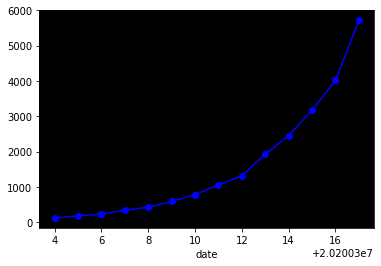

In [7]:
daily_cases_by_state.sum().plot(style=['bo-']).set_facecolor("black")

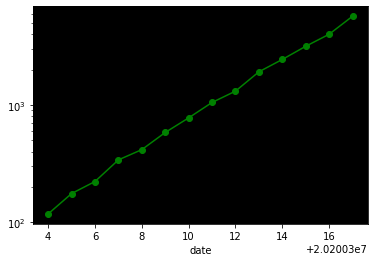

In [8]:
daily_cases_by_state.sum().plot(style=['go-'], logy=True).set_facecolor("black")